# ETH Data

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

ticker = "ETH-USD"
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2022, 5, 1)

eth_data = pdr.get_data_yahoo(ticker, start, end)
print(eth_data)

                   High          Low         Open        Close       Volume  \
Date                                                                          
2020-01-01   132.835358   129.198288   129.630661   130.802002   7935230330   
2020-01-02   130.820038   126.954910   130.820038   127.410179   8032709256   
2020-01-03   134.554016   126.490021   127.411263   134.171707  10476845358   
2020-01-04   136.052719   133.040558   134.168518   135.069366   7430904515   
2020-01-05   139.410202   135.045624   135.072098   136.276779   7526675353   
...                 ...          ...          ...          ...          ...   
2022-04-28  2973.135010  2861.821533  2888.849854  2936.940918  18443524633   
2022-04-29  2943.445801  2782.435303  2936.776611  2815.601807  18771041399   
2022-04-30  2836.827637  2727.406250  2815.533447  2730.186768  13520941867   
2022-05-01  2838.704346  2728.078857  2729.994141  2827.756104  15332730152   
2022-05-02  2874.145996  2785.522949  2827.614014  2

In [4]:
eth_data = pd.DataFrame(eth_data)

In [5]:
eth_data.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

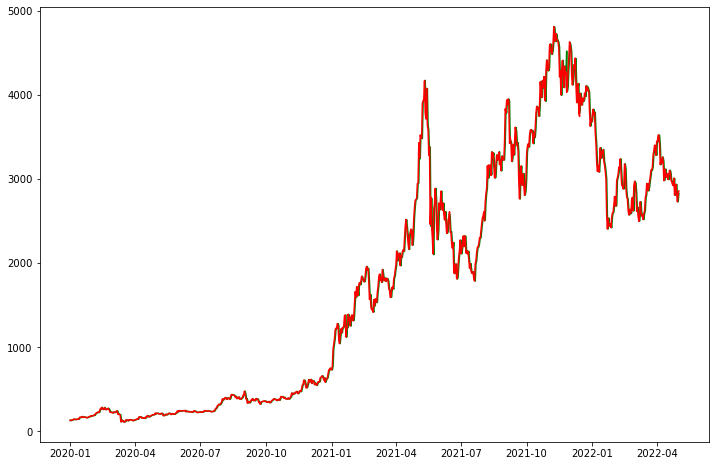

In [7]:
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(eth_data['Open'], 'g', label='High')
plt.plot(eth_data['Close'], 'r', label='Low')
plt.show()

In [8]:
# Adding Daily Average

eth_data['Daily_Avg'] = (eth_data['High'] + eth_data['Low'])/2
eth_data

,High,Low,Open,Close,Volume,Adj Close,Daily_Avg
Date,,,,,,,
2020-01-01,132.835358,129.198288,129.630661,130.802002,7935230330,130.802002,131.016823
2020-01-02,130.820038,126.954910,130.820038,127.410179,8032709256,127.410179,128.887474
2020-01-03,134.554016,126.490021,127.411263,134.171707,10476845358,134.171707,130.522018
2020-01-04,136.052719,133.040558,134.168518,135.069366,7430904515,135.069366,134.546638
2020-01-05,139.410202,135.045624,135.072098,136.276779,7526675353,136.276779,137.227913
...,...,...,...,...,...,...,...
2022-04-28,2973.135010,2861.821533,2888.849854,2936.940918,18443524633,2936.940918,2917.478271
2022-04-29,2943.445801,2782.435303,2936.776611,2815.601807,18771041399,2815.601807,2862.940552
2022-04-30,2836.827637,2727.406250,2815.533447,2730.186768,13520941867,2730.186768,2782.116943


In [9]:
# Create a column 'Future_Returns' with the calculation of % change
eth_data['Future_Returns'] = eth_data['Close'].pct_change().shift(-1)

# Create the signal column 
# (if future return is greater than 0, then assign 1('buy'signal), otherwise, assign 0('do not buy' signal)
eth_data['Signal'] = np.where(eth_data['Future_Returns'] > 0, 1, 0)

eth_data.head()

,High,Low,Open,Close,Volume,Adj Close,Daily_Avg,Future_Returns,Signal
Date,,,,,,,,,
2020-01-01,132.835358,129.198288,129.630661,130.802002,7935230330,130.802002,131.016823,-0.025931,0
2020-01-02,130.820038,126.954910,130.820038,127.410179,8032709256,127.410179,128.887474,0.053069,1
2020-01-03,134.554016,126.490021,127.411263,134.171707,10476845358,134.171707,130.522018,0.006690,1
2020-01-04,136.052719,133.040558,134.168518,135.069366,7430904515,135.069366,134.546638,0.008939,1
2020-01-05,139.410202,135.045624,135.072098,136.276779,7526675353,136.276779,137.227913,0.058905,1


In [10]:
# Dropping Adjust Close column

eth_data.drop(columns=['Adj Close'], inplace=True)
eth_data.head()

,High,Low,Open,Close,Volume,Daily_Avg,Future_Returns,Signal
Date,,,,,,,,
2020-01-01,132.835358,129.198288,129.630661,130.802002,7935230330,131.016823,-0.025931,0
2020-01-02,130.820038,126.954910,130.820038,127.410179,8032709256,128.887474,0.053069,1
2020-01-03,134.554016,126.490021,127.411263,134.171707,10476845358,130.522018,0.006690,1
2020-01-04,136.052719,133.040558,134.168518,135.069366,7430904515,134.546638,0.008939,1
2020-01-05,139.410202,135.045624,135.072098,136.276779,7526675353,137.227913,0.058905,1


RSI(Relative Strength Index) - momentum indicator that measures the magnitutde of recent price changes to evaluate overbought or oversold conditions in the price of a stock

ADX(Average Directional Index) - determines the strength of a trend

In [14]:
import talib as ta

In [18]:
# There are 6.5 trading hours in a day
# Create RSI column
eth_data['RSI'] = ta.RSI(eth_data['Close'].values, timeperiod=int(2))

# Create ADX column
eth_data['ADX'] = ta.ADX(eth_data['High'].values, eth_data['Low'].values, eth_data['Open'].values, timeperiod=int(2))

eth_data.head(20)

,High,Low,Open,Close,Volume,Daily_Avg,Future_Returns,Signal,RSI,ADX
Date,,,,,,,,,,
2020-01-01,132.835358,129.198288,129.630661,130.802002,7935230330,131.016823,-0.025931,0,NaN,NaN
2020-01-02,130.820038,126.954910,130.820038,127.410179,8032709256,128.887474,0.053069,1,NaN,NaN
2020-01-03,134.554016,126.490021,127.411263,134.171707,10476845358,130.522018,0.006690,1,66.594055,NaN
2020-01-04,136.052719,133.040558,134.168518,135.069366,7430904515,134.546638,0.008939,1,71.613385,62.615949
2020-01-05,139.410202,135.045624,135.072098,136.276779,7526675353,137.227913,0.058905,1,79.784491,76.037625
2020-01-06,144.328186,136.079636,136.305542,144.304153,9093747121,140.203911,-0.005268,0,95.812426,86.168661
2020-01-07,145.001770,140.488876,144.311996,143.543991,9257954672,142.745323,-0.015924,0,83.303526,91.513431
2020-01-08,146.828003,138.268204,143.487823,141.258133,9387194957,142.548103,-0.016133,0,46.663891,46.423781
2020-01-09,141.393982,136.236404,141.155777,138.979202,7697325348,138.815193,0.035866,1,24.860891,47.420221


Creating the simple moving average and rolling correlation of the close price.

In [36]:
# Create a column by the name sma, and assign the SMA values to it
eth_data['SMA'] = eth_data['Close'].rolling(window=2).mean()

# Create a column by the name corr, and assign the correlation values to it
eth_data['Corr'] = eth_data['Close'].rolling(window=24).corr(eth_data['SMA'])

In [37]:
# Create percent change column
eth_data['Pct_Change'] = eth_data['Close'].pct_change()

# Create volatility column
eth_data['Volatility'] = eth_data.rolling(window=2,min_periods=2)['Pct_Change'].std()*100

In [38]:
eth_data

,High,Low,Open,Close,Volume,Daily_Avg,Future_Returns,Signal,RSI,ADX,SMA,Corr,Pct_Change,Volatility
Date,,,,,,,,,,,,,,
2020-01-01,132.835358,129.198288,129.630661,130.802002,7935230330,131.016823,-0.025931,0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,130.820038,126.954910,130.820038,127.410179,8032709256,128.887474,0.053069,1,NaN,NaN,129.106091,NaN,-0.025931,NaN
2020-01-03,134.554016,126.490021,127.411263,134.171707,10476845358,130.522018,0.006690,1,66.594055,NaN,130.790943,NaN,0.053069,5.586140
2020-01-04,136.052719,133.040558,134.168518,135.069366,7430904515,134.546638,0.008939,1,71.613385,62.615949,134.620537,NaN,0.006690,3.279462
2020-01-05,139.410202,135.045624,135.072098,136.276779,7526675353,137.227913,0.058905,1,79.784491,76.037625,135.673073,NaN,0.008939,0.159016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-28,2973.135010,2861.821533,2888.849854,2936.940918,18443524633,2917.478271,-0.041315,0,65.088803,71.382057,2912.935303,0.938698,0.016619,0.855089
2022-04-29,2943.445801,2782.435303,2936.776611,2815.601807,18771041399,2862.940552,-0.030336,0,25.127831,60.207834,2876.271362,0.917835,-0.041315,4.096541
2022-04-30,2836.827637,2727.406250,2815.533447,2730.186768,13520941867,2782.116943,0.035737,1,13.478013,66.774659,2772.894287,0.945089,-0.030336,0.776294


In [39]:
eth_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 853 entries, 2020-01-01 to 2022-05-02
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   High            853 non-null    float64
 1   Low             853 non-null    float64
 2   Open            853 non-null    float64
 3   Close           853 non-null    float64
 4   Volume          853 non-null    int64  
 5   Daily_Avg       853 non-null    float64
 6   Future_Returns  852 non-null    float64
 7   Signal          853 non-null    int32  
 8   RSI             851 non-null    float64
 9   ADX             850 non-null    float64
 10  SMA             852 non-null    float64
 11  Corr            829 non-null    float64
 12  Pct_Change      852 non-null    float64
 13  Volatility      851 non-null    float64
dtypes: float64(12), int32(1), int64(1)
memory usage: 96.6 KB


In [40]:
# Fill missing values with mean
eth_data['Future_Returns'] = eth_data['Future_Returns'].fillna(eth_data['Future_Returns'].mean())
eth_data['RSI'] = eth_data['RSI'].fillna(eth_data['RSI'].mean())
eth_data['ADX'] = eth_data['ADX'].fillna(eth_data['ADX'].mean())
eth_data['SMA'] = eth_data['SMA'].fillna(eth_data['SMA'].mean())
eth_data['Corr'] = eth_data['Corr'].fillna(eth_data['Corr'].mean())
eth_data['Pct_Change'] = eth_data['Pct_Change'].fillna(eth_data['Pct_Change'].mean())
eth_data['ADX'] = eth_data['ADX'].fillna(eth_data['ADX'].mean())
eth_data['Volatility'] = eth_data['Volatility'].fillna(eth_data['Volatility'].mean())

In [85]:
eth_data.to_csv('data/eth_data_final.csv')

Create the features(X) and target(y)

In [42]:
# Target
y = eth_data[['Signal']]

# Features
X = eth_data[['RSI', 'ADX', 'SMA', 'Corr', 'Pct_Change', 'Volatility']]

Stationary Check

In [45]:
from statsmodels.tsa.stattools import adfuller

def stationary(series):
    """Function to check if the series is stationary or not.
    """

    result = adfuller(series)
    if(result[1] < 0.05):
        return 'stationary'
    else:
        return 'not stationary'


# Check for stationarity
for col in X.columns:
    if stationary(eth_data[col]) == 'not stationary':
        print('%s is not stationary. Dropping it.' % col)
        X.drop(columns=[col], axis=1, inplace=True)
    else:
        print('%s is stationary.' % col)

RSI is stationary.
ADX is stationary.
SMA is not stationary. Dropping it.
Corr is stationary.
Pct_Change is stationary.
Volatility is stationary.


In [46]:
# Since SMA is not stationary, the column is dropped from X
X

,RSI,ADX,Corr,Pct_Change,Volatility
Date,,,,,
2020-01-01,56.198885,67.255758,0.952290,0.004969,3.852508
2020-01-02,56.198885,67.255758,0.952290,-0.025931,3.852508
2020-01-03,66.594055,67.255758,0.952290,0.053069,5.586140
2020-01-04,71.613385,62.615949,0.952290,0.006690,3.279462
2020-01-05,79.784491,76.037625,0.952290,0.008939,0.159016
...,...,...,...,...,...
2022-04-28,65.088803,71.382057,0.938698,0.016619,0.855089
2022-04-29,25.127831,60.207834,0.917835,-0.041315,4.096541
2022-04-30,13.478013,66.774659,0.945089,-0.030336,0.776294


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

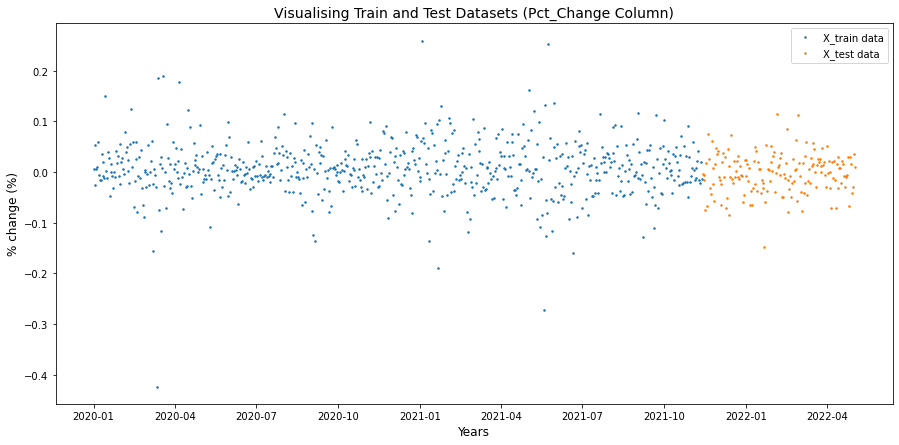

In [48]:
# Plot the data
plt.figure(figsize=(15, 7))

plt.plot(X_train['Pct_Change'], linestyle='None',
         marker='.', markersize=3.0, label='X_train data')
plt.plot(X_test['Pct_Change'], linestyle='None',
         marker='.', markersize=3.0, label='X_test data')

# Set the title and axis label
plt.title("Visualising Train and Test Datasets (Pct_Change Column)", fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('% change (%)', fontsize=12)

# Display the plot
plt.legend()
plt.show()